<a href="https://colab.research.google.com/github/cs10101/cs10101/blob/main/christopher_scott_Data_Science_Assessment_OC_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# christopher scott
# outcome 4 assesment
# computer science B
# 24/04/24

# the objective is to predict the value of house prices using selcted features. (i.e. Gr Liv Area, Overall Qual and Total bsmt SF)

# Setup

In [ ]:
# imported libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sklearn

# the following code will always display all of the columns instead of the first few and the last few
pd.set_option('display.max_columns', None)

In [ ]:
# importing the dataset and renaming it to 'house_data' which is how the data will be referenced throughout the project.
house_data = pd.read_csv("Duloc.csv")

# Exploratory Data Analysis

In [ ]:
# this is the inital shape of the dataset before any records or columns are removed
house_data.shape

(2930, 65)

In [ ]:
# this gives us information on all of the columns in the dataset including their datatypes
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [ ]:
# this gives us basic statistical information on the columns that hold numeric data
house_data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,755000.000000


In [ ]:
# this code is used to show each of the columns and how many null values there in each column column.
# for this task i am going to drop all of the columns with null values that i dont need
# i will remove the individual records from columns that contain null values of columns i will use later on
house_data.isnull().sum()

,0
Order,0
PID,0
MS SubClass,0
Lot Frontage,490
Lot Area,0
...,...
Garage Area,1
Garage Cond,159
Wood Deck SF,0
Open Porch SF,0


In [ ]:
# in order to run a successfull correlation using this dataset we are only able to use numeric values and not object values.
# to do this we use the code below to specify that we are only using the numeric values.
# by doing this we are able to see how negativly or positivly the values correlate with each other.
corr_data = house_data.corr(numeric_only = True)
corr_data

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,-0.032321,-0.002773,0.005780,-0.028719,-0.013201,-0.000417,0.013589,-0.009342,-0.042539,0.024978,-0.044985,-0.039749,0.015424,-0.017685,0.002612,-0.019156,-0.051160,-0.036185,-0.035435,-0.011292,0.016355,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,-0.001145,-0.087707,-0.189642,-0.141902,-0.003289,0.056940,-0.107579,-0.037759,0.004328,-0.171431,-0.166636,0.006345,0.076470,-0.068981,-0.108056,-0.256829,-0.237484,-0.210606,-0.051135,-0.071311,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,-0.070946,-0.130421,-0.219445,-0.247828,0.304237,0.025765,0.068061,0.013701,-0.003329,0.134631,0.175879,-0.019208,0.257698,0.031898,-0.049955,0.088754,-0.045883,-0.103239,-0.017310,-0.014823,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,0.045999,0.116743,0.353773,0.457391,0.029187,0.005249,0.383822,0.108915,-0.024724,0.184521,0.041880,0.240442,0.005407,0.353137,0.257255,0.076306,0.308706,0.358505,0.120084,0.163040,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,0.083150,0.023658,0.253589,0.332235,0.032996,0.000812,0.285599,0.125877,0.026903,0.127433,0.035497,0.136569,-0.020301,0.216597,0.256989,-0.008952,0.179512,0.212822,0.157212,0.103760,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,-0.041287,0.270058,0.547294,0.477837,0.241402,-0.048680,0.570556,0.167858,-0.041647,0.522263,0.268853,0.063291,-0.159744,0.380693,0.393007,0.570569,0.599545,0.563503,0.255663,0.298412,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,0.041134,-0.136819,-0.173344,-0.157052,0.006218,0.009175,-0.115643,-0.042766,0.084455,-0.214316,-0.088127,-0.006137,-0.086386,-0.089816,-0.031702,-0.326017,-0.181557,-0.153754,0.020344,-0.068934,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,-0.027415,0.128998,0.407526,0.310463,0.016828,-0.144282,0.241726,0.211849,-0.030626,0.469406,0.269268,-0.055093,-0.137852,0.111919,0.170672,0.834849,0.537443,0.480131,0.228964,0.198365,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,-0.062129,0.164805,0.297481,0.242108,0.158939,-0.060365,0.316855,0.134387,-0.046292,0.457266,0.211771,-0.021536,-0.142404,0.197528,0.133322,0.652310,0.425403,0.376438,0.217857,0.241748,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,-0.016019,0.091668,0.397040,0.395736,0.121805,-0.057701,0.403611,0.140113,0.015421,0.260153,0.192965,0.080546,-0.050998,0.279563,0.272068,0.254784,0.360159,0.373458,0.165467,0.143748,0.508285


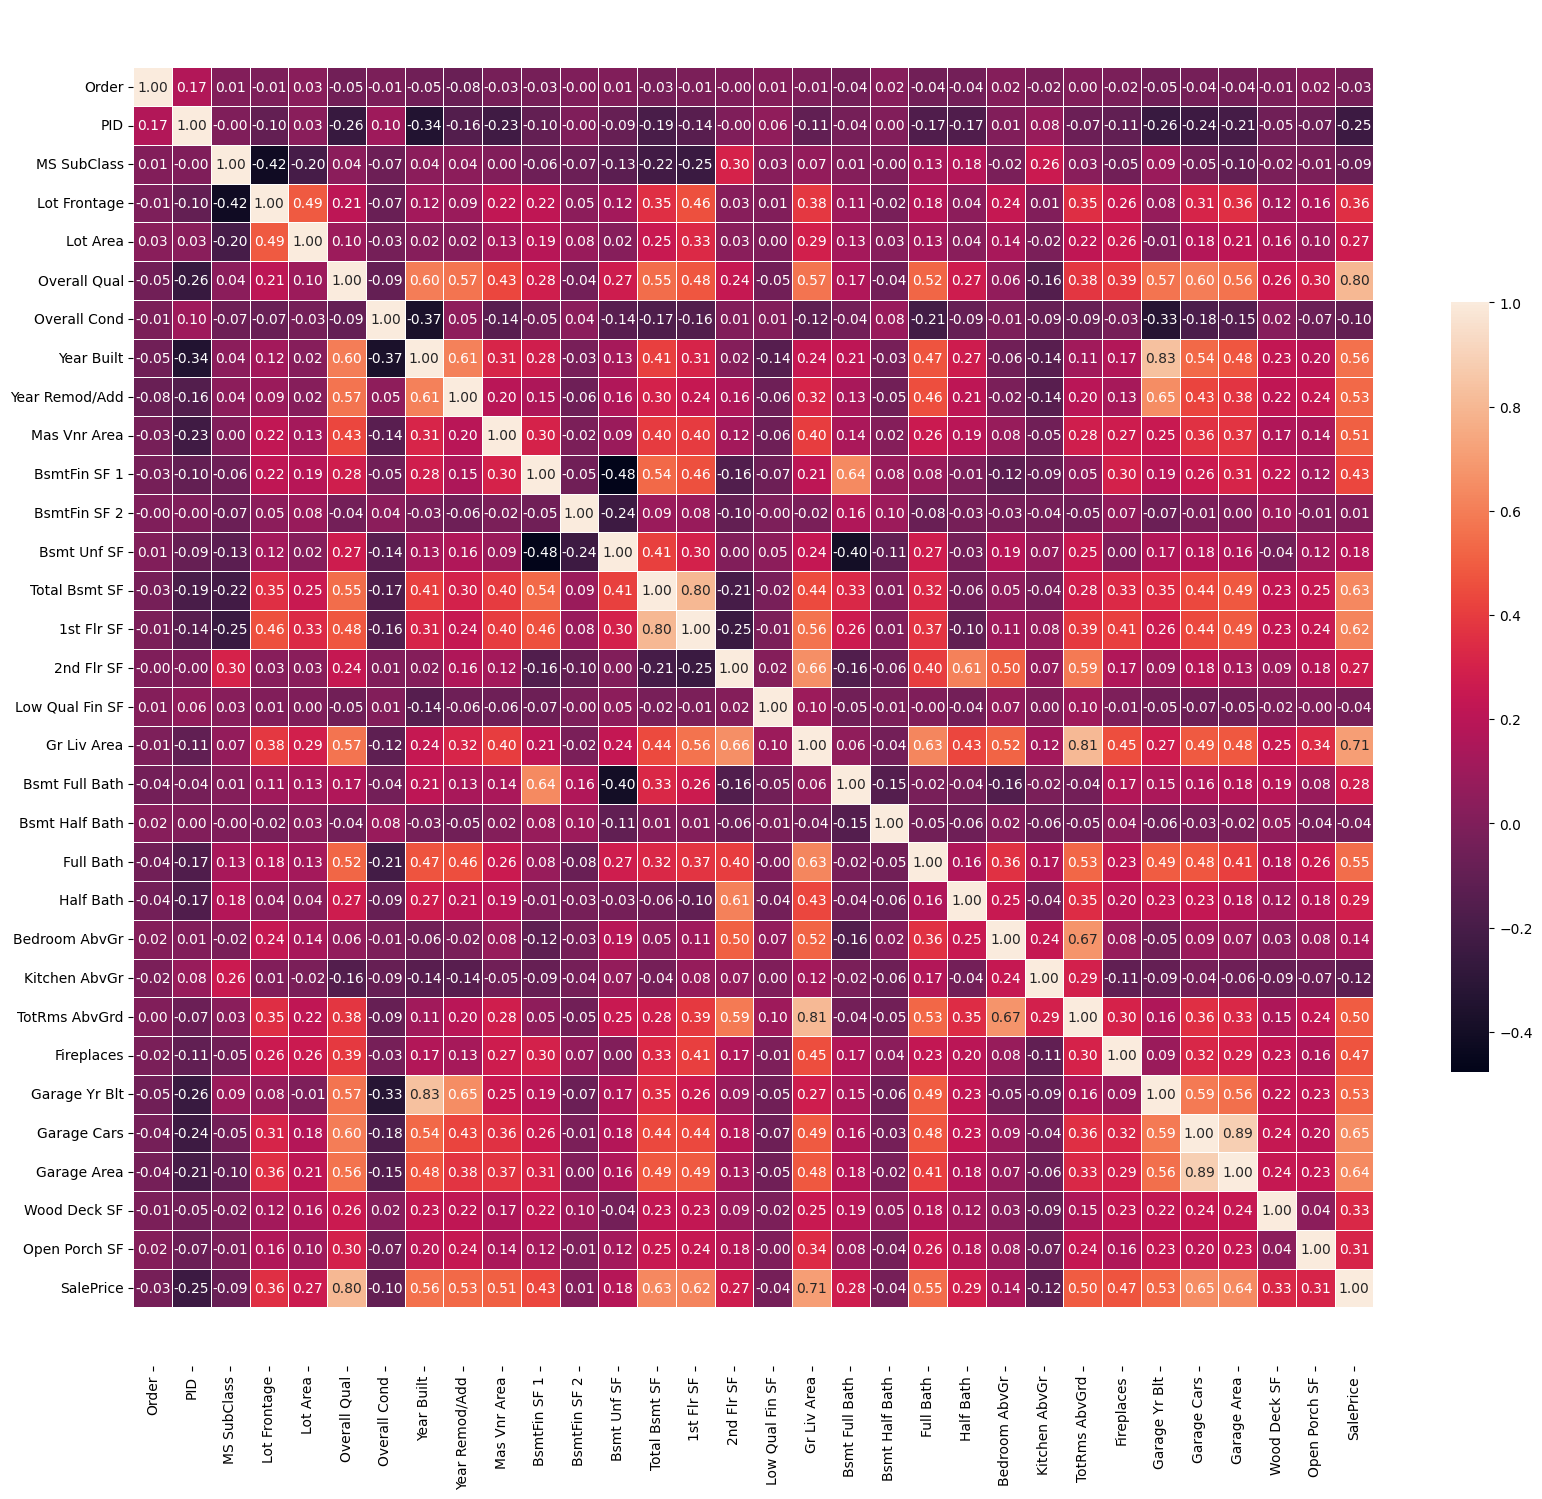

In [ ]:
# this is a heatmap to show two variables that correlate very well with each other and which varaibles dont in the dataset

f, ax = plt.subplots(figsize=(20, 20))
corr_heat = sns.heatmap(corr_data, square = True, annot = True, fmt = '.2f', linewidth = .6, cbar_kws = {'shrink': 0.5})
bottom, top = ax.get_ylim()
corr_heat.set_ylim(bottom + 1.5, top - 1.5)
plt.show()

# in this heatmap we can see all of the different numeric variables and how they correlate with each other.
# we can see that for example the varaibles 'Overall Qual' and 'SalePrice' have strong positive correlation with each other.
# in another example we can see that 'PID' and 'SalesPrice' have a weak negative correlation.

# NOTE: heatmaps only work with numeric data, object datatypes wont work.

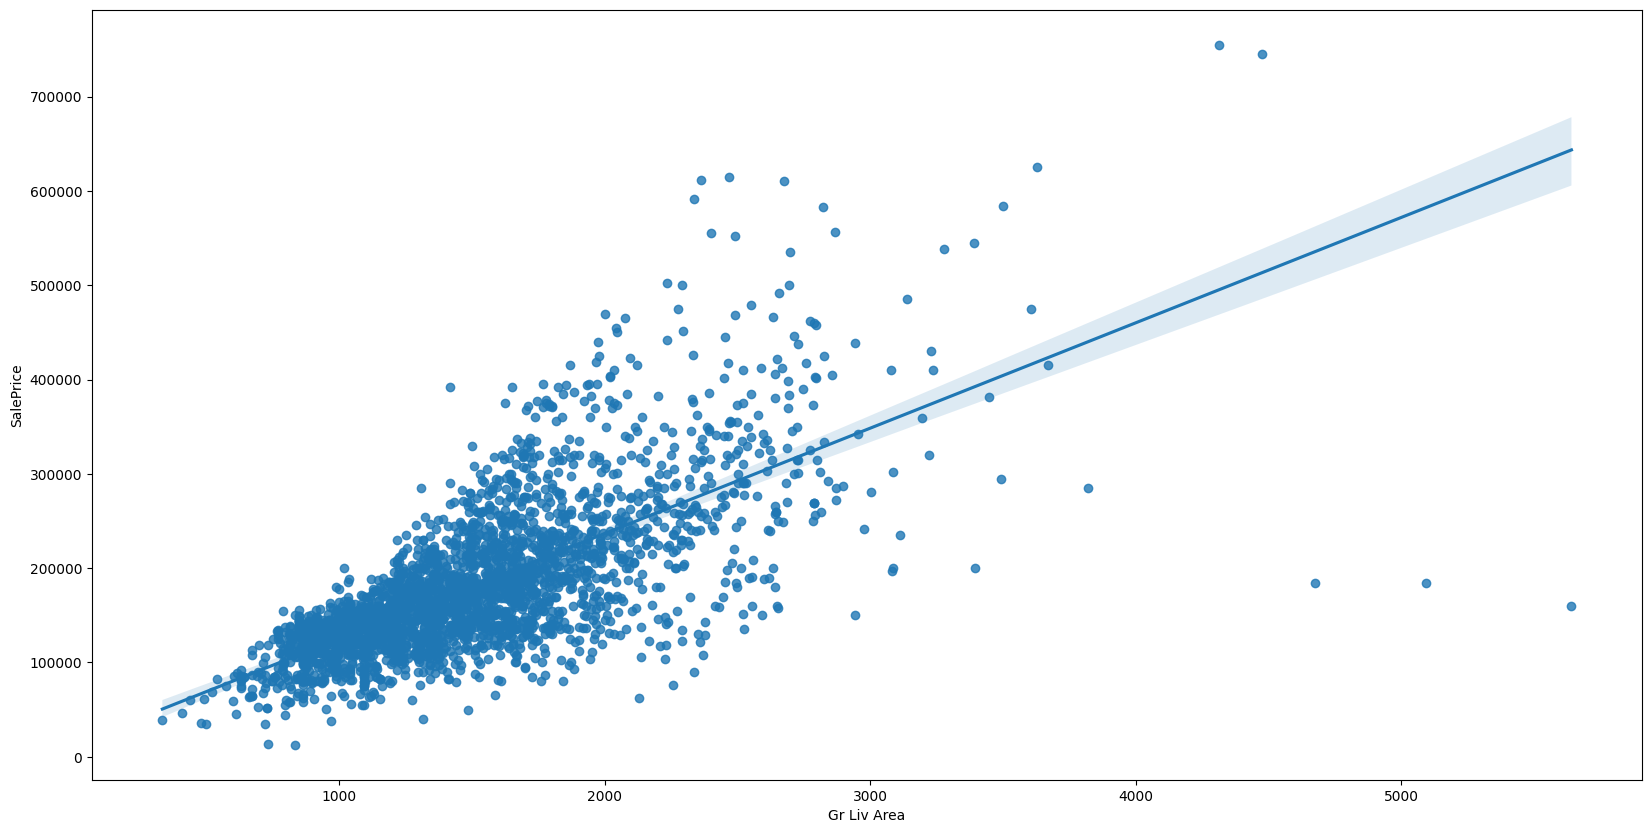

In [ ]:
# from this regression plot we can see that there is a high corrolation with SalePrice

plt.figure(figsize=(20, 10))
sns.regplot(x = 'Gr Liv Area', y = 'SalePrice', data = house_data);

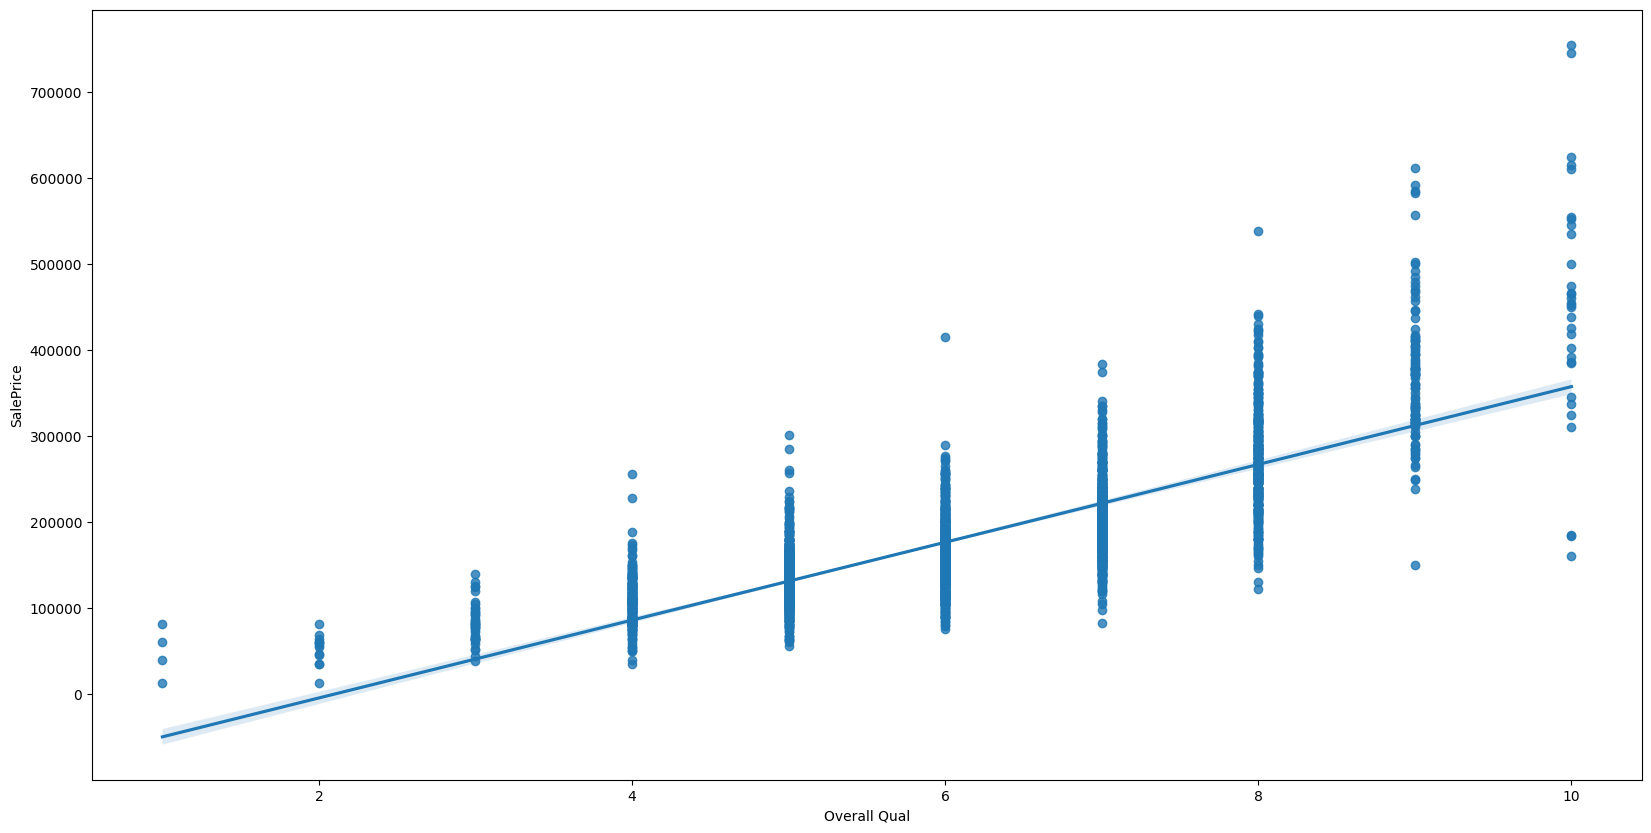

In [ ]:
# from this regression plot we can see that there is still a corrolation between the Overall Qual and the SalePrice
plt.figure(figsize=(20, 10))
sns.regplot(x = 'Overall Qual', y = 'SalePrice', data = house_data);

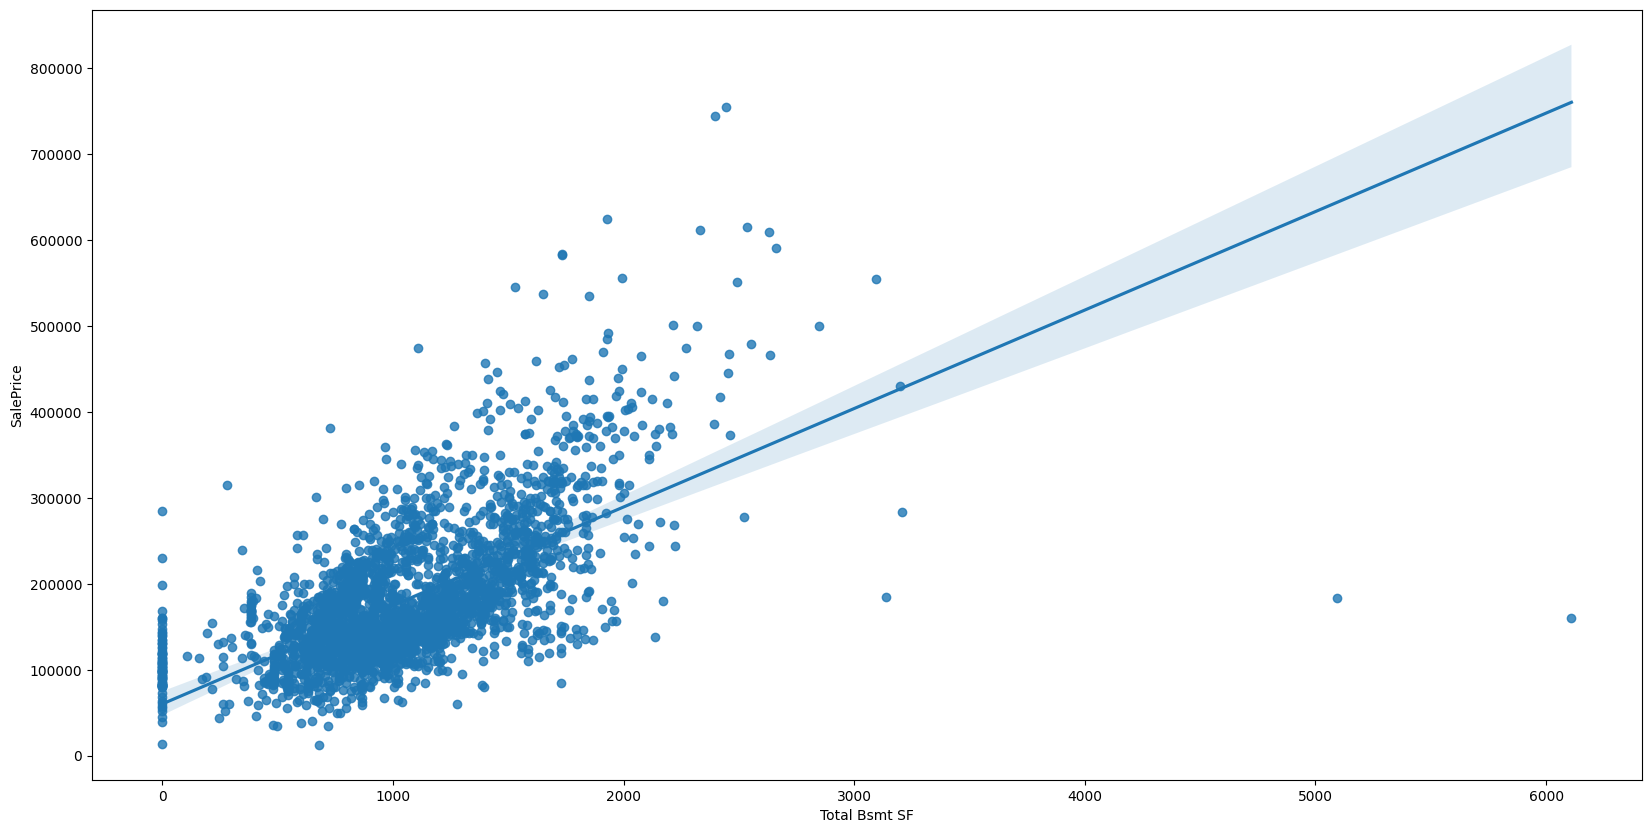

In [ ]:
# the regression plot shows that there is a correlation between the Total Bsmt SF and the SalePrice

plt.figure(figsize=(20, 10))
sns.regplot(x = 'Total Bsmt SF', y = 'SalePrice', data = house_data);

# Transforming the data

# dropping columns and records with null values

In [ ]:
# this is used to easily see all of the columns in one spot

house_data.columns

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Cond', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
  

In [ ]:
# to start off with we need to remove all of the columns in the dataset that will not be using for the modeling phase of the project because they are simply not needed
# the only columns that should be remaining in the dataset are the 'Overall Qual', 'Total Bsmt Area', 'Gr Liv area' and the 'SalePrice' columns because these are the only columns we are going to be using.

house_data.drop(columns = ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Street',
                           'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
                           'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
                           'House Style', 'Overall Cond', 'Year Built',
                           'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
                           'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
                           'Exter Cond', 'Foundation', 'Bsmt Cond', 'BsmtFin Type 1',
                           'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
                           'Heating', 'Heating QC', 'Central Air', 'Electrical',
                           '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
                           'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
                           'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
                           'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type',
                           'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
                           'Garage Cond', 'Wood Deck SF', 'Open Porch SF'], inplace = True)

house_data.columns

Index(['Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'SalePrice'], dtype='object')

In [ ]:
# now we need to check to see if the remaining columns that we are going to be using contain any null values which need to be removed.
# from what we can see from this output is that there is one null value that we need to remove from the 'Total Bsmt SF' column

house_data.isnull().sum()

,0
Overall Qual,0
Total Bsmt SF,1
Gr Liv Area,0
SalePrice,0


In [ ]:
# this peice of code is used to drop any records from the 'Total Bsmt Area' column which have a null value
# by removing the null value we make the data more accurate and increse the chance of the model working later on in the project.

house_data.drop(house_data[house_data['Total Bsmt SF'].isnull()].index, inplace = True)
house_data.isnull().sum()

,0
Overall Qual,0
Total Bsmt SF,0
Gr Liv Area,0
SalePrice,0


# checking for and removing anomalies from the 'Total Bsmt SF'

In [ ]:
# this shows us statistical information about the column

house_data['Total Bsmt SF'].describe()

,Total Bsmt SF
count,2929.000000
mean,1051.614544
std,440.615067
min,0.000000
25%,793.000000
50%,990.000000
75%,1302.000000
max,6110.000000


<Axes: ylabel='Total Bsmt SF'>

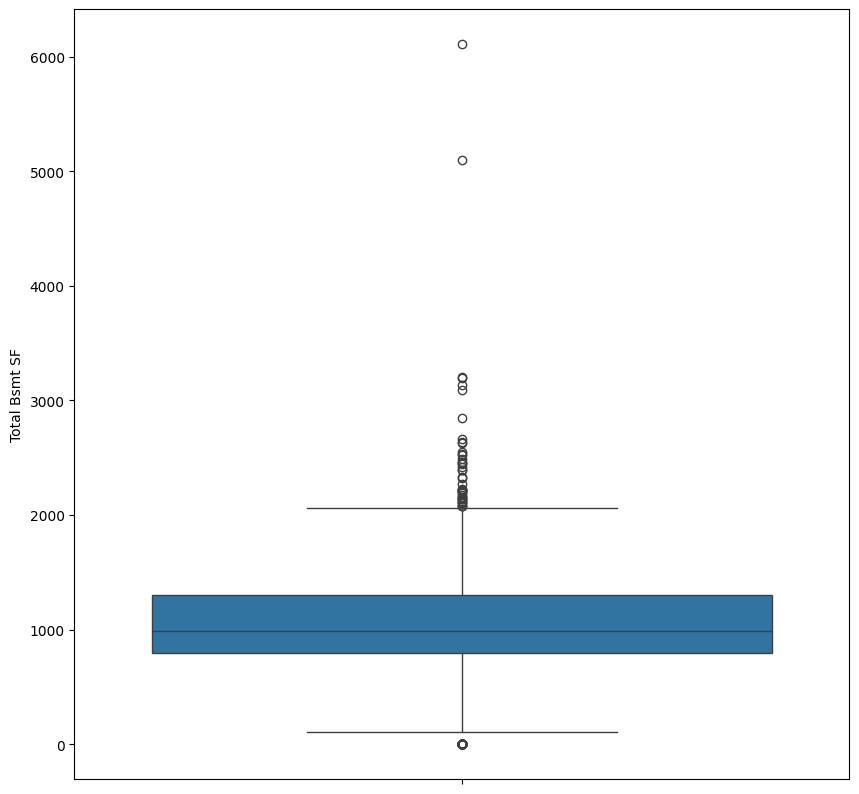

In [ ]:
# this is used to generate a box and whisket plot of the column to identify any outliers which may be present in the column
# we want to remove outliers from the columns because outliers can decrease the accuracy of the model

plt.figure(figsize = (10, 10))
sns.boxplot(house_data['Total Bsmt SF'])

In [ ]:
# after identifying the outliers we can then write the following code to have them all dropped so that our results will be more accurate

house_data.drop(house_data[house_data['Total Bsmt SF'] < 793].index, inplace = True)
house_data.drop(house_data[house_data['Total Bsmt SF'] > 2250].index, inplace = True)

In [ ]:
# this code checks that the outliers have been removed

house_data.loc[(house_data['Total Bsmt SF'] < 793) & (house_data['Gr Liv Area'] > 2250)]

,Overall Qual,Total Bsmt SF,Gr Liv Area,SalePrice


In [ ]:
# now we are going to check for any duplicated peices of data within the column
# in some scenarios it would be a good idea to remove any duplicated peices of data
# however I belive that these duplicates should be left in as multiple houses may have been built using the same blueprints and therfore have the smae set of features

duplicated_TotalBsmtSF_data = house_data['Total Bsmt SF'].duplicated()
print(duplicated_TotalBsmtSF_data)

0       False
1       False
2       False
3       False
4       False
        ...  
2925    False
2926     True
2927     True
2928     True
2929     True
Name: Total Bsmt SF, Length: 2174, dtype: bool


# checking for and removing anomalies from the 'Gr Liv Area' column

In [ ]:
# this shows us statistical information on the column

house_data['Gr Liv Area'].describe()

,Gr Liv Area
count,2174.000000
mean,1540.537259
std,489.768129
min,793.000000
25%,1149.250000
50%,1496.000000
75%,1800.000000
max,3672.000000


<Axes: ylabel='Gr Liv Area'>

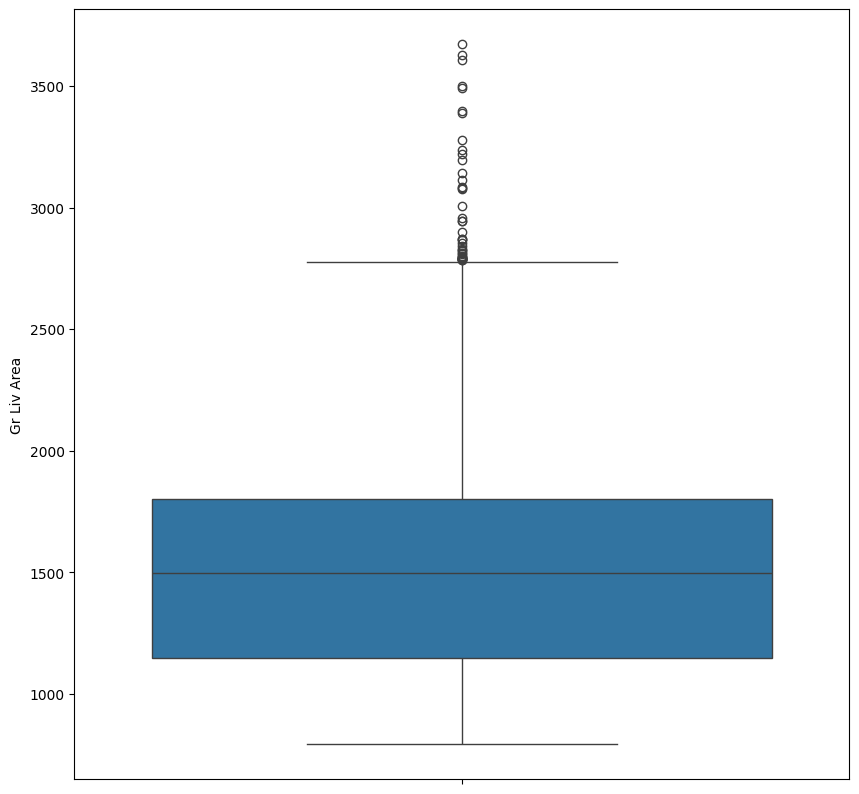

In [ ]:
# this creates a box plot to show any outliers within the column

plt.figure(figsize = (10, 10))
sns.boxplot(house_data['Gr Liv Area'])

In [ ]:
# this is used to drop all of the outliers within the column

house_data.drop(house_data[house_data['Gr Liv Area'] > 2500].index, inplace = True)

In [ ]:
# this is used to show that the outliers have been removed

house_data.loc[house_data['Gr Liv Area'] > 2500]

,Overall Qual,Total Bsmt SF,Gr Liv Area,SalePrice


In [ ]:
duplicated_GrLivArea_data = house_data['Gr Liv Area'].duplicated()
print(duplicated_GrLivArea_data)

0       False
1       False
2       False
3       False
4       False
        ...  
2925    False
2926     True
2927     True
2928    False
2929     True
Name: Gr Liv Area, Length: 2068, dtype: bool


# checking for and removing anomalies from the 'Overall Qual' column

In [ ]:
house_data['Overall Qual'].describe()

,Overall Qual
count,2068.000000
mean,6.220503
std,1.309311
min,3.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,10.000000


<Axes: ylabel='Overall Qual'>

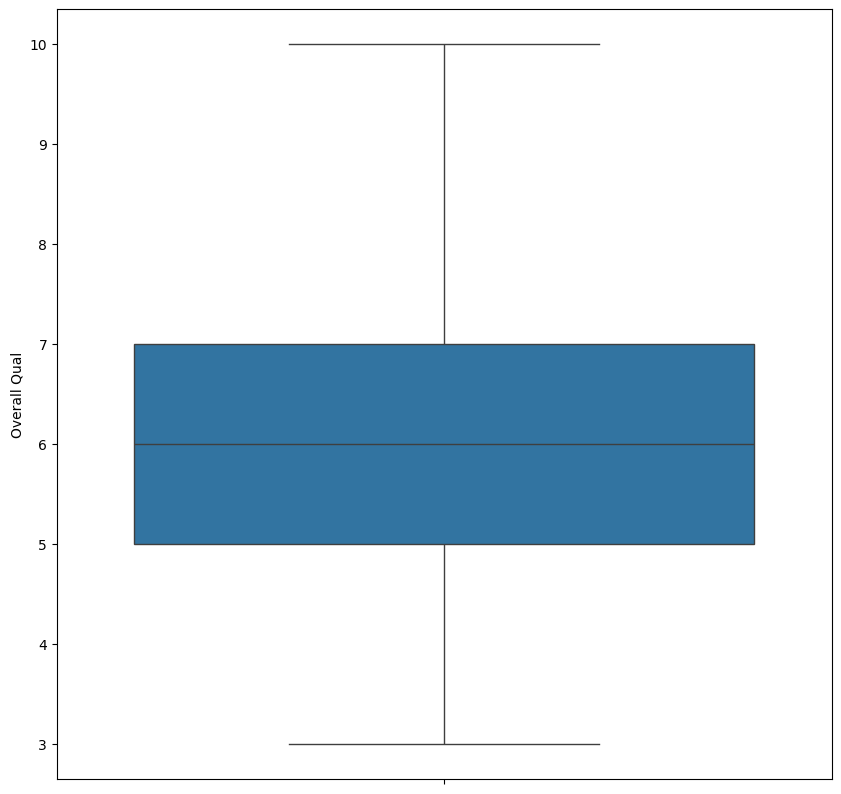

In [ ]:
# for this example here i belive it would be in my best intrest to leave these outliers in the dataset as the quality rating is important information to the dataset

plt.figure(figsize = (10, 10))
sns.boxplot(house_data['Overall Qual'])

In [ ]:
duplicated_OverallQual_data = house_data['Overall Qual'].duplicated()
print(duplicated_OverallQual_data)

0       False
1       False
2        True
3       False
4        True
        ...  
2925     True
2926     True
2927     True
2928     True
2929     True
Name: Overall Qual, Length: 2068, dtype: bool


# secondary correlation and stats

In [ ]:
# this is statistical information of all of the remaining columns
# a secondary correlation is to be able to see how the correlation between columns has changed over the course of the project.

house_data.describe()

,Overall Qual,Total Bsmt SF,Gr Liv Area,SalePrice
count,2068.000000,2068.000000,2068.000000,2068.000000
mean,6.220503,1181.516925,1476.964700,186581.343327
std,1.309311,309.012246,406.966453,67542.377189
min,3.000000,793.000000,793.000000,55000.000000
25%,5.000000,928.000000,1137.750000,137000.000000
50%,6.000000,1094.500000,1464.500000,171000.000000
75%,7.000000,1386.000000,1740.500000,222500.000000
max,10.000000,2223.000000,2500.000000,501837.000000


In [ ]:
# this shows the corrolation between the columns after the null values and outliers have been removed
# we can see that the corrolation has decreased a lot by doing this

house_data.corr()

,Overall Qual,Total Bsmt SF,Gr Liv Area,SalePrice
Overall Qual,1.000000,0.498403,0.528116,0.814945
Total Bsmt SF,0.498403,1.000000,0.361489,0.608972
Gr Liv Area,0.528116,0.361489,1.000000,0.660700
SalePrice,0.814945,0.608972,0.660700,1.000000


# distribution of the SalePrice column

In [ ]:
# shows statistical information on the SalePrice column

house_data['SalePrice'].describe()

,SalePrice
count,2068.000000
mean,186581.343327
std,67542.377189
min,55000.000000
25%,137000.000000
50%,171000.000000
75%,222500.000000
max,501837.000000


<Axes: ylabel='SalePrice'>

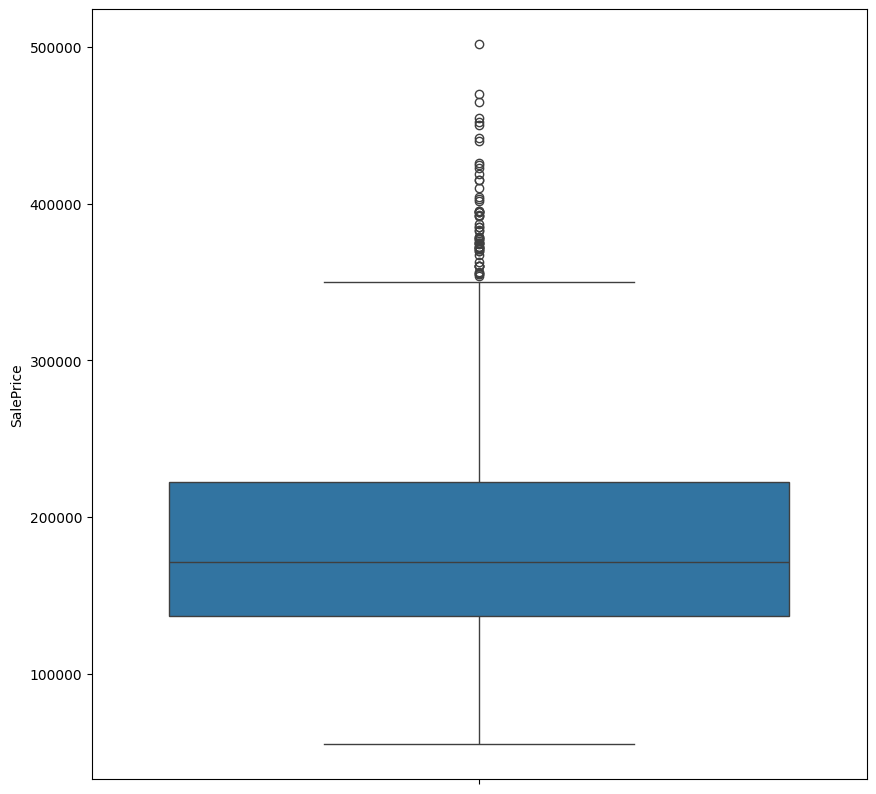

In [ ]:
# we can see that in this boxplot of the SalePrice column that there are outliers that need to be removed

plt.figure(figsize = (10, 10))
sns.boxplot(house_data['SalePrice'])

In [ ]:
# removing too many outliers can negativly impact model training which is why I will be removing the more extreme outliers in the column
house_data.drop(house_data[house_data['SalePrice'] > 400000].index, inplace = True)

Text(0.5, 1.0, 'Distribution of Sale Price')

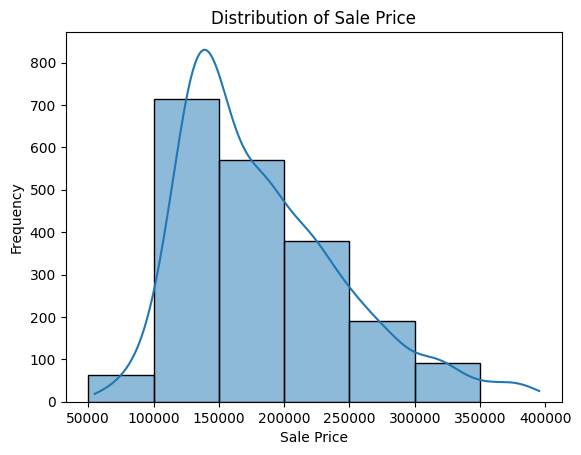

In [ ]:
# creates a histogram with 7 bins
sns.histplot(house_data['SalePrice'], bins = [50000, 100000, 150000, 200000, 250000, 300000, 350000], kde = True)

# creates labels for the graph
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')

In [ ]:
# we now need to figure out how we are going to limit the data.
# from the graph above we can see that the largest proporions of the data lie in the 100000 - 300000 section
# this means that we can limit the data to the

sale_price_final = house_data.loc[(house_data['SalePrice'] < 300000) & (house_data['SalePrice'] > 100000)]


# Final correlation

In [ ]:
# the final set of statistical information about the final columns in the dataset
house_data.describe()

,Overall Qual,Total Bsmt SF,Gr Liv Area,SalePrice
count,2050.000000,2050.000000,2050.000000,2050.000000
mean,6.194634,1174.626341,1471.499024,184406.018537
std,1.283476,301.002381,404.295294,63654.950966
min,3.000000,793.000000,793.000000,55000.000000
25%,5.000000,927.250000,1132.250000,136592.500000
50%,6.000000,1092.000000,1456.000000,170000.000000
75%,7.000000,1372.750000,1733.750000,220750.000000
max,10.000000,2223.000000,2500.000000,395192.000000


In [ ]:
# we can see here that the final correlation between the variables has changes throughout the project as records have been removes and data has been restricted

corr_final = sale_price_final.corr()
corr_final

,Overall Qual,Total Bsmt SF,Gr Liv Area,SalePrice
Overall Qual,1.000000,0.361121,0.446902,0.764463
Total Bsmt SF,0.361121,1.000000,0.267074,0.465416
Gr Liv Area,0.446902,0.267074,1.000000,0.640373
SalePrice,0.764463,0.465416,0.640373,1.000000


# modeling the data

# setting up the target and features variables

In [ ]:
# the house features are whats going to be compaired to the target variable which is the SalePrice
# all of these feature were choosen at the start of the project based on the initil correlation values being high

house_features = ['Total Bsmt SF', 'Overall Qual', 'Gr Liv Area']
X = house_data[house_features]
y = house_data['SalePrice']

# train, test, split

In [ ]:
# whats going on here is that we are setting aside some of the data we have to be used to train the data and the rest of the data is going to be used to test the model
# we can see here that i have allocated 20% of the data to test the model, leaving the remaining 80% to train the model.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.20, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1640, 3)
(410, 3)
(1640,)
(410,)


# deciding on what model to use

In [ ]:
# in this project a linear regression model is going to be used as linear regression is used to measure the relationship between a y-variable and one or more x-variables

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

house_sale_model = LinearRegression()
house_sale_model.fit(X_train, y_train)

LinearRegression()

# Evaluating the model

In [ ]:
# the metrics here show the R2 value being 0.44 which means that the model could fit the data a little better

house_sale_LR = house_sale_model.predict(X_test)
MAE = mean_absolute_error(y_test, house_sale_LR)
R2 = r2_score(y_test, house_sale_LR)
#MAE = mean_absolute_error(y_test, house_sale_LR)
#R2 = r2_score(y_test, house_sale_LR)

print('MAE score:', round(MAE, 2))
print('R2 score:', round(R2, 2))

MAE score: 23374.1
R2 score: 0.79


In [ ]:
# here we are vewing the model make=ing predictions and then compairing the prediction to the actual result
# this will be in a more viewable form below

pred_results = pd.DataFrame({'Actual': y_test, 'Predicted': house_sale_LR})
pred_results = pred_results.astype('int64')
pred_results

,Actual,Predicted
560,131400,122369
497,340000,284004
974,130000,109743
136,180000,275702
255,155000,151860
...,...,...
667,154000,184055
1415,125000,136972
2460,198600,228921
749,155000,187075


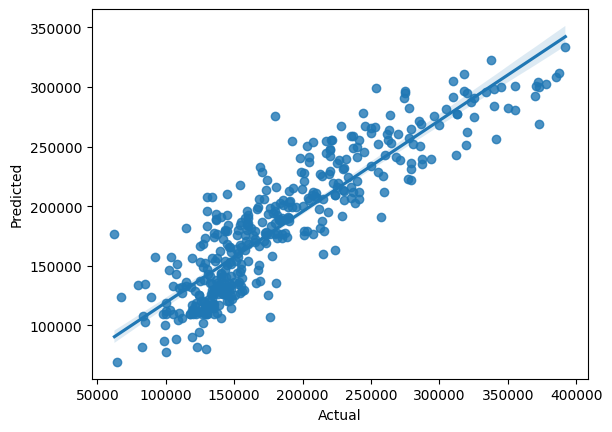

In [ ]:
# this is a visual representation of the predictions made by the model agains the test data.
# from this bar plot we can see that the model fits the data pretty well
sns.regplot(x = 'Actual', y = 'Predicted', data = pred_results)
plt.show()